In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


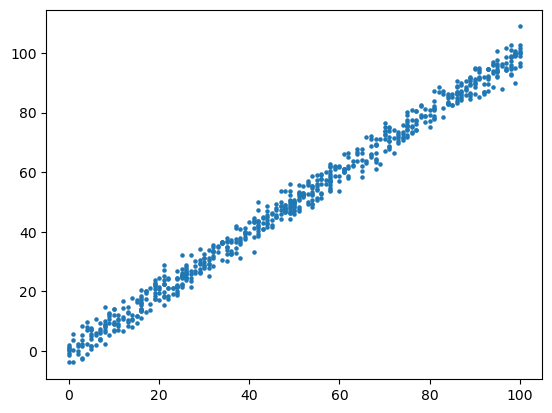

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['x'],df['y'], s = 5)

In [9]:
from sklearn.linear_model import LinearRegression

# Data Cleaning

In [20]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [21]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  700


,Total Missing,In Percent
y,1,0.14
x,0,0.00


In [22]:
df = df.dropna(subset=['y'])

In [24]:
df.shape

(699, 2)

# Basic Modelling and Simple Prediction

In [25]:
model = LinearRegression()

In [26]:
X_train = np.array(df.iloc[:, :-1].values)
y_train = np.array(df.iloc[:, 1].values)

In [28]:
lr = model.fit(X_train, y_train)

In [29]:
lr.score(X_train, y_train)

0.9907015319025518

In [30]:
lr.coef_

array([1.00065638])

In [31]:
lr.predict(np.array([[10]]))

array([9.89929835])

# Loading Test Data

In [32]:
test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

In [33]:
X_test = np.array(test.iloc[:, :-1].values)
y_test = np.array(test.iloc[:, 1].values)

In [34]:
accuracy = lr.score(X_test,y_test)

In [35]:
print(accuracy)

0.9888014444327563


In [37]:
y_pred = lr.predict(X_test)

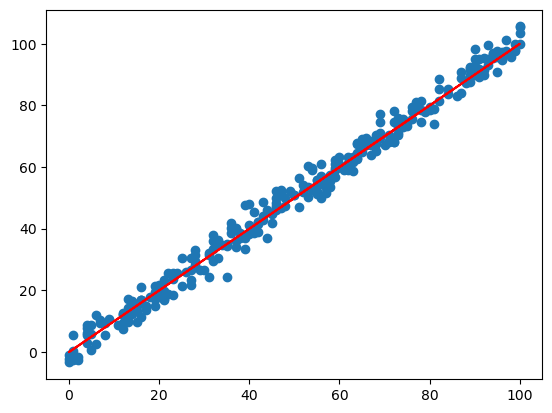

In [38]:
plt.scatter("x","y",data = test)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

# Applying Accuracy Metrics on regression

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MSE

In [40]:
mean_absolute_error(y_test, y_pred)

2.415771850041258

In [41]:
mean_squared_error(y_test, y_pred)

9.432922192039305

## Root MSE

In [43]:
from math import sqrt

In [44]:
sqrt(mean_squared_error(y_test, y_pred))

3.071306268029827